<a href="https://colab.research.google.com/github/mtcorreia/CI_AI_ADS/blob/main/Aula_9_e_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn.
03 de Maio de 2024.

## Prevendo o preço da Pizza na cidade do Rio de Janeiro com técnicas de Regressão Linear.

In [ ]:
# Importando o MatPlotLib e Numpy.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# Suponha que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses.
# Diâmetro (cm).
Diametros = [[7], [10], [15], [30], [50]]

# Preços (R$).
Precos = [[8], [11], [16], [38.5], [52]]

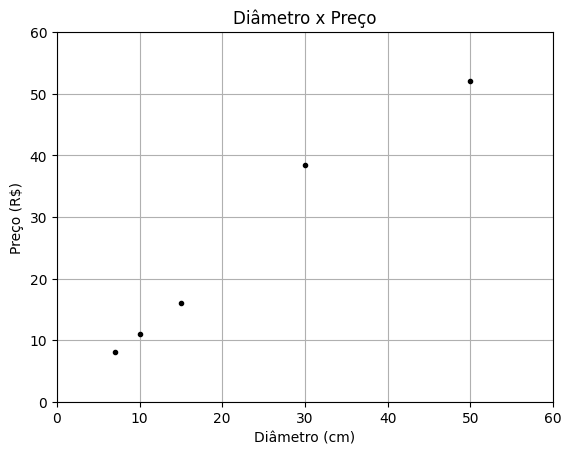

In [ ]:
# Visualizando os dados com plot.
plt.figure()
plt.xlabel('Diâmetro (cm)') # Nome do eixo X.
plt.ylabel('Preço (R$)') # Nome do eixo Y.
plt.title('Diâmetro x Preço') # Título do gráfico.
plt.plot(Diametros, Precos, 'k.') # Plotando os dados de Diametros e Precos, 'k.' deixa em pontos e 'k' deixa a reta.
plt.axis([0, 60, 0, 60]) # Quantidade de valores, 0 até 60.
plt.grid(True) # Linha de auxílio.
plt.show()

In [ ]:
# Importando o módulo de Regressão Linear do Scikit-Learn.
from sklearn.linear_model import LinearRegression

In [ ]:
# Preparando os dados de treino.
# Chamar de X os dados de diâmetro da Pizza.
X = [[7], [10], [15], [30], [45]]

# Chamar de Y os dados de preço da Pizza.
Y = [[8], [11], [16], [38.5], [52]]

In [ ]:
# Criando a variável do modelo.
modelo = LinearRegression()

In [ ]:
# Chegando a tipagem da variável 'modelo'.
type(modelo)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Treinando o modelo.
modelo .fit(X, Y)

LinearRegression()

In [ ]:
# Vamos prever o preço da pizza de 35 cm de diâmetro.
print(f"Uma pizza de 35cm de diâmetro deve custar: R$ {modelo.predict([[35]])}")

# Y é o valor previsto da variável dependente (em nosso exemplo o preço da pizza).
# X é a variável explanatória (o diâmtro da pizza).
# Alfa é o termo de interceção ou coeficiente linear.
# Beta é o coefiencie de cada variável ou coeficiente angular.

Uma pizza de 35cm de diâmetro deve custar: R$ [[41.47740785]]


In [ ]:
# Métricas de ML = Regressão Linear.
# Coeficientes:
print('Coeficientes:', modelo.coef_)

# MSE (Mean Square Error).
print('MSE: %.2f' % np.mean((modelo.predict(X) - Y) ** 2))

# Score da variação: 1 representa a predição perfeita.
print('Score de variação: %.2f' % modelo.score(X, Y))

Coeficientes: [[1.20422117]]
MSE: 2.74
Score de variação: 0.99


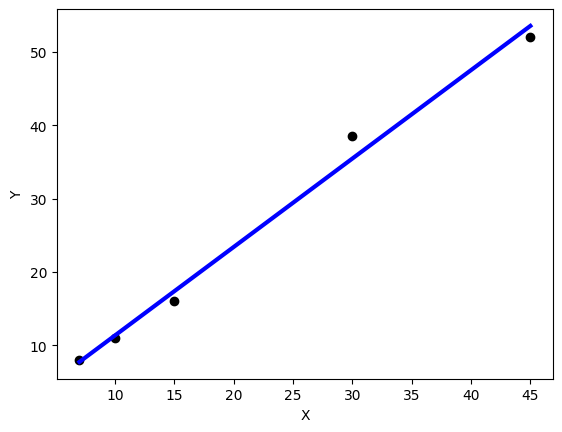

In [ ]:
# Scatter Plot representando a regressão linear.
plt.scatter(X, Y, color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks
plt.yticks

plt.show()

# Predição de preço de casas.

07 de Junho de 2024.

In [ ]:
# Importando os módulos do exercício.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import sklearn

%matplotlib inline

In [ ]:
# Importando dataset.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
# Checando o tamanho da tabelo e dos dados.
housing.data.shape

(20640, 8)

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Convertendo o dataset em um DataFrame de Pandas.
df = pd.DataFrame(housing.data)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Nome das colunas.
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Inserindo o nome das colunas na tabela.
df.columns = housing.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Housing.target é um array com o preço das casas.
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# Checando o número de instâncias.
housing.target.size

20640

In [ ]:
# Adicionando uma tabela target ao DataFrame.
df['PRICE'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Prevendo o preço das casas na California.

07 de Junho de 2024.

### Y - variável dependente (preço das casas na California).

### X - variáveis independentes ou explanatórias (todas as outras características da casa).

In [ ]:
# Importando o módulo de regressão linear.
from sklearn.linear_model import LinearRegression

In [ ]:
# Não queremos o preço da casa como variável dependente.
X = df.drop('PRICE', axis = 1)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Definindo Y.
Y = df.PRICE

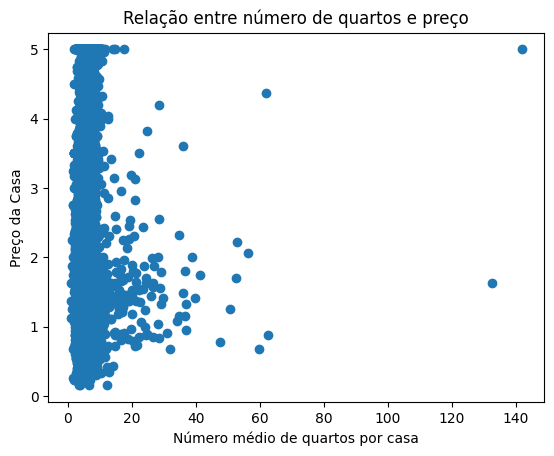

In [ ]:
plt.scatter(X.AveRooms, Y)
plt.xlabel('Número médio de quartos por casa')
plt.ylabel('Preço da Casa')
plt.title("Relação entre número de quartos e preço")
plt.show()

In [ ]:
# Criando o objeto de regressão linear.
regr = LinearRegression()

In [ ]:
# Treinando o modelo.
regr.fit(X, Y)

LinearRegression()

In [ ]:
# Coeficients.
print('Coeficiente: \n', regr.intercept_)
print("Número de coeficientes: ", len(regr.coef_))

Coeficiente: 
 -36.94192020718441
Número de coeficientes:  8


In [ ]:
# Prevendo o preço da casa.
regr.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

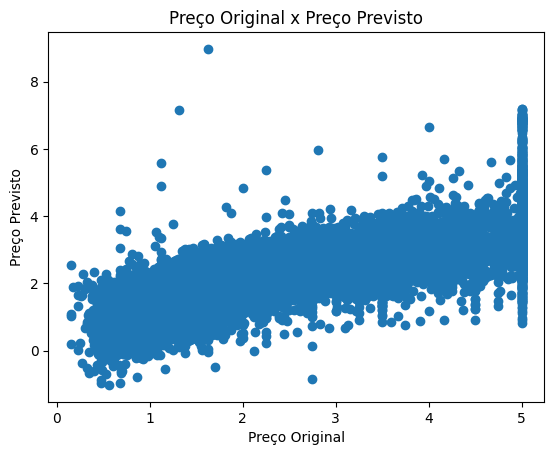

In [ ]:
# Comparando preços originais x preços previstos.
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [ ]:
# Calculando o MSE (Mean Squared Error).
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print("Mean Squared Error (Erro médio quadrático):", mse1)

Mean Squared Error (Erro médio quadrático): 0.5243209861846072


In [ ]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE.
regr = LinearRegression()
regr.fit(X[['HouseAge']], df.PRICE)

mse2 = np.mean((df.PRICE - regr.predict(X[['HouseAge']])) ** 2)
print("Mean Squared Error (Erro médio quadrático):", mse2)

Mean Squared Error (Erro médio quadrático): 1.3166951184561146


##### O MSE aumentou, indicando que uma única feature como essa não é um bom preditor para o preço das casas.

##### Na prática, você NÃO vai implementar regressão linear em todo o dataset e nem em uma feature só, você vai dividir o dataset em datasets de treino e de teste. Assim, você treina o seu modelo nos dados de treinos e depois verifica com o modelo se comporta nos seus dados de teste.

In [ ]:
# Dividindo X em dados de treino e de teste.
X_treino = X[:-70]
X_teste = X[-30:]

# Dividindo Y em dados de treino e de teste.
Y_treino = df.PRICE[:-70]
Y_teste = df.PRICE[-30:]

# Imprimindo o shape dos datasets.
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(20570, 8)
(30, 8)
(20570,)
(30,)


### Podemos criar nossos datasets de treino de forma manual, mas claro este não é um método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split( ) para isso:

In [ ]:
# Importando.
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo o X e Y em dados de treino e de teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.30, random_state = 5)

# Imprimindo o shape dos datasets.
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


In [ ]:
# Construindo um modelo de regressão.
regr = LinearRegression()

In [ ]:
# Treinando o modelo.
regr.fit(X_treino, Y_treino)

LinearRegression()

In [ ]:
# Definindo dados de treino e de teste.
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

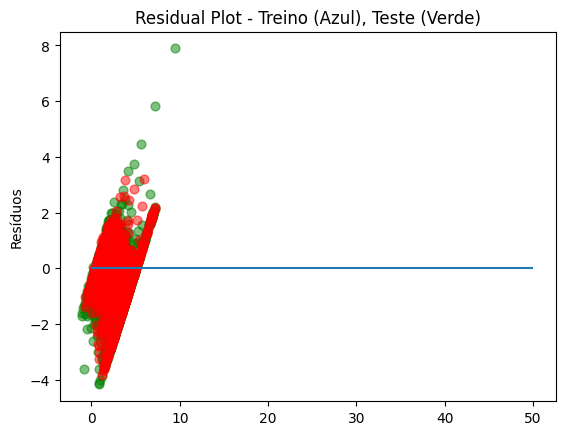

In [ ]:
# Comparando preços originais x preços previstos.
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'g', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'r', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduos")
plt.title("Residual Plot - Treino (Azul), Teste (Verde)")
plt.show()